2.7.0
Train set size (60000, 28, 28)
Train labels size 60000
Predict set size (10000, 28, 28)
Predict labels size 10000


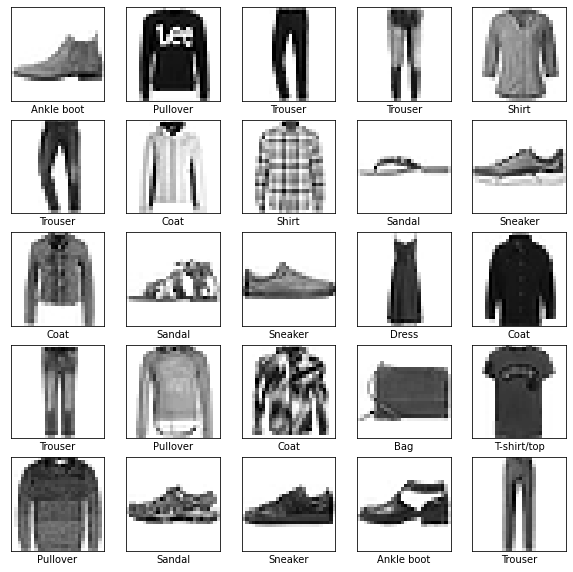

Epoch 1/10
313/313 [==============================] - 1s 1ms/step - loss: 0.7388 - accuracy: 0.7438
Epoch 2/10
313/313 [==============================] - 0s 1ms/step - loss: 0.5265 - accuracy: 0.8171

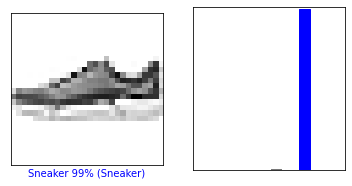

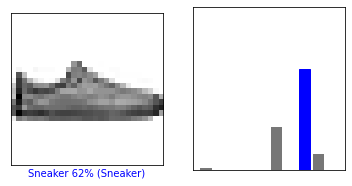

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

print(tf.__version__)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (predict_images, predict_labels) = fashion_mnist.load_data()
print("Train set size", train_images.shape)
print("Train labels size", len(train_labels))
print("Predict set size", predict_images.shape)
print("Predict labels size", len(predict_labels))

train_images = train_images / 255.0
predict_images = predict_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predict_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[predict_labels[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(predict_images, predict_labels, epochs=10)
predict_loss, predict_acc = model.evaluate(predict_images,  predict_labels, verbose=2)

print('Точность на проверочных данных:', predict_acc)

predictions = model.predict(predict_images)

for i in range(25):
    print("Index", " ", i, " ", predictions[i], np.argmax(predictions[i]), class_names[predict_labels[i]], class_names[np.argmax(predictions[i])])

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
i = 9
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()